In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./compression-data.csv', sep=';')

In [3]:
data = data.sort_values('cells')
#data = data[data['cells'] > 0]
fulldata = data
data.head()

,cells,bytes,build_duration_nanosec,build_duration_total_nanosec,retr_duration_avg_nanosec,algorithm,table
475,3783197,167772160,230158273,4416992177,27,baseline,mate_main_tokenized
476,3783890,167772160,217960147,4404894733,26,baseline,mate_main_tokenized
474,7570579,335544320,470906076,5142281258,26,baseline,mate_main_tokenized
473,7571169,335544320,440872255,5196603475,26,baseline,mate_main_tokenized
419,8765848,23533248,1023305437,13329448631,287,ns,main_tokenized_embedding


In [4]:
c = {
    'ns': 'red',
    'baseline': 'blue',
    'dedup_hash': 'orange',
    'dedup_btree': 'violet',
}   


Text(0.5, 1.0, 'index duration per collection')

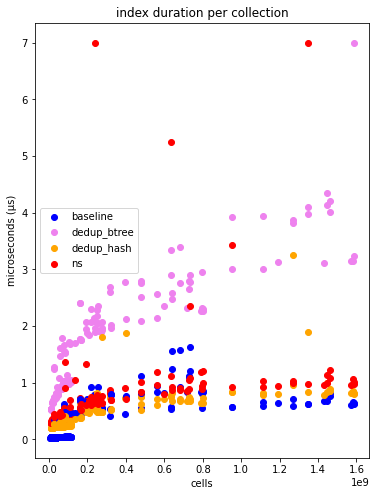

In [19]:

fig, ax = plt.subplots(figsize=(12, 8))

data['retr_duration_avg_microsec'] = data['retr_duration_avg_nanosec'] / 1000

data['retr_duration_avg_microsec_capped'] = np.array([min(7.0, elem) for elem in data['retr_duration_avg_microsec']])

done = set()
for [table,algo], row in data.groupby(["table", "algorithm"]):
    p = ax.scatter('cells', 'retr_duration_avg_microsec_capped', c=c[algo], data=row, label="")

    if not algo in done:
        done.add(algo)
        p.set_label(algo)


ax.legend()
ax.set_ylabel('microseconds (μs)')
ax.set_xlabel('cells')
ax.set_title("index duration per collection")

## TODO 

- investigate relation between cardinality and access time
- investigate relation between cardinality and difference in compression (baseline vs dedup)

Text(0.5, 1.0, 'build time per algorithm')

<Figure size 432x288 with 0 Axes>

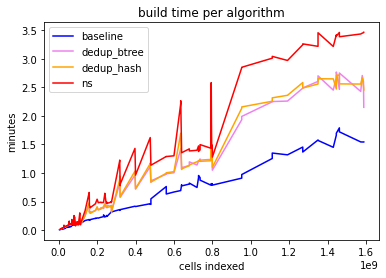

In [6]:
plt.figure(figsize=(6, 4))
fig, bta = plt.subplots()

data["build_duration_sec"] = data["build_duration_nanosec"] * 1e-9
data["build_duration_min"] = data["build_duration_sec"] / 60

for algo,row in data.groupby("algorithm"):
    p, = bta.plot('cells', 'build_duration_min', c=c[algo], data=row)
    p.set_label(algo)


bta.set_xlabel('cells indexed')
bta.set_ylabel('minutes')
bta.legend()
bta.set_title("build time per algorithm")

Text(0.5, 1.0, 'memory per table')

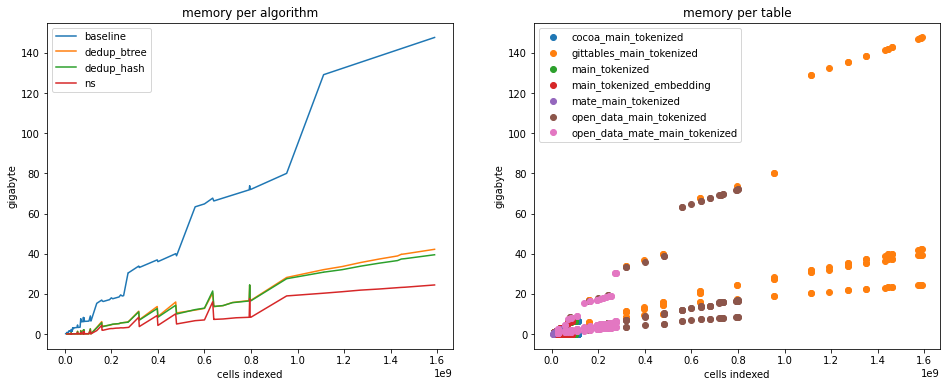

In [12]:
data['gigabyte'] = data['bytes'] / 1e9

fig,[mpa, mpt] = plt.subplots(1, 2, figsize=(16, 6))
for algo,row in data.groupby("algorithm"):
    p, = mpa.plot('cells', 'gigabyte',data=row)
    p.set_label(algo)
    # mpt.scatter('cells', 'gigabyte', data=row, label="")

mpa.set_xlabel('cells indexed')
mpa.set_ylabel('gigabyte')
mpa.legend()
mpa.set_title("memory per algorithm")

# now per table
#fig,mpt = plt.subplots(figsize=(16, 6))
for table,row in data.groupby("table"):
    p = mpt.scatter('cells', 'gigabyte', data=row)
    p.set_label(table)

mpt.set_xlabel('cells indexed')
mpt.set_ylabel('gigabyte')
mpt.legend()
mpt.set_title("memory per table")

the memory footprint is not dependant on the dataset at hand, but rather the amount of data consumed and the algorithm presented